It is highly recommended to use a powerful **GPU**, you can use it for free uploading this notebook to [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).
<table align="center">
 <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ezponda/intro_deep_learning/blob/main/class/CNN/Object_Detection.ipynb">
        <img src="https://i.ibb.co/2P3SLwK/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/ezponda/intro_deep_learning/blob/main/class/CNN/Object_Detection.ipynb">
        <img src="https://i.ibb.co/xfJbPmL/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>

### TensorFlow Hub

[TensorFlow Hub](https://www.tensorflow.org/hub) is a repository of trained machine learning models. You can install it with: 
```python
!pip install --upgrade tensorflow_hub
```


In [1]:
!pip install --upgrade tensorflow_hub
!pip install tensorflow

In [2]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image, ImageDraw
from IPython.display import Image as IPyImage
import time

We can find multiple [models](https://tfhub.dev/tensorflow/collections/object_detection/1) in [Tensorflow-Hub](https://www.tensorflow.org/hub), and [here](https://tfhub.dev/s?module-type=image-object-detection) you can find all the models.

In [3]:
ALL_MODELS = {
    'CenterNet HourGlass104 512x512':
    'https://tfhub.dev/tensorflow/centernet/hourglass_512x512/1',
    'CenterNet HourGlass104 Keypoints 512x512':
    'https://tfhub.dev/tensorflow/centernet/hourglass_512x512_kpts/1',
    'CenterNet HourGlass104 1024x1024':
    'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024/1',
    'CenterNet HourGlass104 Keypoints 1024x1024':
    'https://tfhub.dev/tensorflow/centernet/hourglass_1024x1024_kpts/1',
    'CenterNet Resnet50 V1 FPN 512x512':
    'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512/1',
    'CenterNet Resnet50 V1 FPN Keypoints 512x512':
    'https://tfhub.dev/tensorflow/centernet/resnet50v1_fpn_512x512_kpts/1',
    'CenterNet Resnet101 V1 FPN 512x512':
    'https://tfhub.dev/tensorflow/centernet/resnet101v1_fpn_512x512/1',
    'CenterNet Resnet50 V2 512x512':
    'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512/1',
    'CenterNet Resnet50 V2 Keypoints 512x512':
    'https://tfhub.dev/tensorflow/centernet/resnet50v2_512x512_kpts/1',
    'EfficientDet D0 512x512':
    'https://tfhub.dev/tensorflow/efficientdet/d0/1',
    'EfficientDet D1 640x640':
    'https://tfhub.dev/tensorflow/efficientdet/d1/1',
    'EfficientDet D2 768x768':
    'https://tfhub.dev/tensorflow/efficientdet/d2/1',
    'EfficientDet D3 896x896':
    'https://tfhub.dev/tensorflow/efficientdet/d3/1',
    'EfficientDet D4 1024x1024':
    'https://tfhub.dev/tensorflow/efficientdet/d4/1',
    'EfficientDet D5 1280x1280':
    'https://tfhub.dev/tensorflow/efficientdet/d5/1',
    'EfficientDet D6 1280x1280':
    'https://tfhub.dev/tensorflow/efficientdet/d6/1',
    'EfficientDet D7 1536x1536':
    'https://tfhub.dev/tensorflow/efficientdet/d7/1',
    'SSD MobileNet v2 320x320':
    'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2',
    'SSD MobileNet V1 FPN 640x640':
    'https://tfhub.dev/tensorflow/ssd_mobilenet_v1/fpn_640x640/1',
    'SSD MobileNet V2 FPNLite 320x320':
    'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1',
    'SSD MobileNet V2 FPNLite 640x640':
    'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_640x640/1',
    'SSD ResNet50 V1 FPN 640x640 (RetinaNet50)':
    'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_640x640/1',
    'SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)':
    'https://tfhub.dev/tensorflow/retinanet/resnet50_v1_fpn_1024x1024/1',
    'SSD ResNet101 V1 FPN 640x640 (RetinaNet101)':
    'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_640x640/1',
    'SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)':
    'https://tfhub.dev/tensorflow/retinanet/resnet101_v1_fpn_1024x1024/1',
    'SSD ResNet152 V1 FPN 640x640 (RetinaNet152)':
    'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_640x640/1',
    'SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)':
    'https://tfhub.dev/tensorflow/retinanet/resnet152_v1_fpn_1024x1024/1',
    'Faster R-CNN ResNet50 V1 640x640':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_640x640/1',
    'Faster R-CNN ResNet50 V1 1024x1024':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_1024x1024/1',
    'Faster R-CNN ResNet50 V1 800x1333':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet50_v1_800x1333/1',
    'Faster R-CNN ResNet101 V1 640x640':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_640x640/1',
    'Faster R-CNN ResNet101 V1 1024x1024':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_1024x1024/1',
    'Faster R-CNN ResNet101 V1 800x1333':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet101_v1_800x1333/1',
    'Faster R-CNN ResNet152 V1 640x640':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_640x640/1',
    'Faster R-CNN ResNet152 V1 1024x1024':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_1024x1024/1',
    'Faster R-CNN ResNet152 V1 800x1333':
    'https://tfhub.dev/tensorflow/faster_rcnn/resnet152_v1_800x1333/1',
    'Faster R-CNN Inception ResNet V2 640x640':
    'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_640x640/1',
    'Faster R-CNN Inception ResNet V2 1024x1024':
    'https://tfhub.dev/tensorflow/faster_rcnn/inception_resnet_v2_1024x1024/1',
    'Mask R-CNN Inception ResNet V2 1024x1024':
    'https://tfhub.dev/tensorflow/mask_rcnn/inception_resnet_v2_1024x1024/1'
}

## total clases
classes = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck', 9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear', 24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase', 34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone', 78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock', 86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

In [4]:
model_name = 'SSD MobileNet V2 FPNLite 320x320' # 'SSD MobileNet v2 320x320' #  ['CenterNet HourGlass104 512x512','CenterNet HourGlass104 Keypoints 512x512','CenterNet HourGlass104 1024x1024','CenterNet HourGlass104 Keypoints 1024x1024','CenterNet Resnet50 V1 FPN 512x512','CenterNet Resnet50 V1 FPN Keypoints 512x512','CenterNet Resnet101 V1 FPN 512x512','CenterNet Resnet50 V2 512x512','CenterNet Resnet50 V2 Keypoints 512x512','EfficientDet D0 512x512','EfficientDet D1 640x640','EfficientDet D2 768x768','EfficientDet D3 896x896','EfficientDet D4 1024x1024','EfficientDet D5 1280x1280','EfficientDet D6 1280x1280','EfficientDet D7 1536x1536','SSD MobileNet v2 320x320','SSD MobileNet V1 FPN 640x640','SSD MobileNet V2 FPNLite 320x320','SSD MobileNet V2 FPNLite 640x640','SSD ResNet50 V1 FPN 640x640 (RetinaNet50)','SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)','SSD ResNet101 V1 FPN 640x640 (RetinaNet101)','SSD ResNet101 V1 FPN 1024x1024 (RetinaNet101)','SSD ResNet152 V1 FPN 640x640 (RetinaNet152)','SSD ResNet152 V1 FPN 1024x1024 (RetinaNet152)','Faster R-CNN ResNet50 V1 640x640','Faster R-CNN ResNet50 V1 1024x1024','Faster R-CNN ResNet50 V1 800x1333','Faster R-CNN ResNet101 V1 640x640','Faster R-CNN ResNet101 V1 1024x1024','Faster R-CNN ResNet101 V1 800x1333','Faster R-CNN ResNet152 V1 640x640','Faster R-CNN ResNet152 V1 1024x1024','Faster R-CNN ResNet152 V1 800x1333','Faster R-CNN Inception ResNet V2 640x640','Faster R-CNN Inception ResNet V2 1024x1024','Mask R-CNN Inception ResNet V2 1024x1024']
model_handle = ALL_MODELS[model_name]
print('Selected model:'+ model_name)
print('Model Handle at TensorFlow Hub: {}'.format(model_handle))
detector = hub.load(model_handle)
print('Model loaded')

Selected model:SSD MobileNet V2 FPNLite 320x320
Model Handle at TensorFlow Hub: https://tfhub.dev/tensorflow/ssd_mobilenet_v2/fpnlite_320x320/1


2022-06-24 22:12:02.924340: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model loaded


### Utilities

Functions included in the [object-detection API](https://www.tensorflow.org/hub/tutorials/object_detection)

In [5]:
# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For measuring the inference time.
import time


def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
    """Adds a bounding box to an image."""
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
    draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
               (left, top)],
              width=thickness,
              fill=color)

    # If the total height of the display strings added to the top of the bounding
    # box exceeds the top of the image, stack the strings below the bounding box
    # instead of above.
    display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
    # Each display_str has a top and bottom margin of 0.05x.
    total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

    if top > total_display_str_height:
        text_bottom = top
    else:
        text_bottom = top + total_display_str_height
    # Reverse list and print from bottom to top.
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                        (left + text_width, text_bottom)],
                       fill=color)
        draw.text((left + margin, text_bottom - text_height - margin),
                  display_str,
                  fill="black",
                  font=font)
        text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.45):
    """Overlay labeled boxes on an image with formatted scores and label names."""
    colors = list(ImageColor.colormap.values())

    try:
        font = ImageFont.truetype(
            "/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",
            25)
    except IOError:
        #print("Font not found, using default font.")
        font = ImageFont.load_default()

    for i in range(min(boxes.shape[0], max_boxes)):
        if scores[i] >= min_score:
            ymin, xmin, ymax, xmax = tuple(boxes[i])
            display_str = "{}: {}%".format(class_names[i],
                                           int(100 * scores[i]))
            color = colors[hash(class_names[i]) % len(colors)]
            image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
            draw_bounding_box_on_image(image_pil,
                                       ymin,
                                       xmin,
                                       ymax,
                                       xmax,
                                       color,
                                       font,
                                       display_str_list=[display_str])
            np.copyto(image, np.array(image_pil))
    return image

## Single Image Object Detection

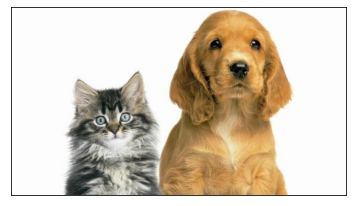

In [6]:
## Detect one image
from matplotlib import pyplot as plt
import numpy as np
def read_image(image_path, target_size=None):
    image = tf.keras.preprocessing.image.load_img(image_path,
                target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image.astype(np.uint8)
    return image

url = 'https://akm-img-a-in.tosshub.com/indiatoday/images/story/201812/dogs_and_cats.jpeg?TAxD19DTCFE7WiSYLUdTu446cfW4AbuW&size=770:433'
image_path = tf.keras.utils.get_file("dog-cat2.jpg", url)
image = read_image(image_path)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
converted_img = np.expand_dims(image, 0)
t = time.time()
result = detector(converted_img)
print("Inference time: ", time.time() - t)
result.keys()

Inference time:  3.7865777015686035


dict_keys(['detection_multiclass_scores', 'raw_detection_boxes', 'detection_boxes', 'detection_classes', 'num_detections', 'detection_scores', 'detection_anchor_indices', 'raw_detection_scores'])

In [8]:
result['detection_scores']

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.717196  , 0.64767975, 0.2302544 , 0.19729169, 0.18980864,
        0.18126339, 0.17523995, 0.1700145 , 0.13334778, 0.12526678,
        0.12250504, 0.12131107, 0.12100441, 0.11208787, 0.11039113,
        0.10458665, 0.09807873, 0.09669162, 0.09617948, 0.09535009,
        0.09138622, 0.08900197, 0.08759945, 0.08356917, 0.08225191,
        0.07880896, 0.07488043, 0.07487186, 0.07007745, 0.06490016,
        0.0620511 , 0.06198935, 0.06167934, 0.05932415, 0.05801816,
        0.05703428, 0.05680894, 0.05650991, 0.05625123, 0.05610194,
        0.05525027, 0.05519735, 0.05476528, 0.05193247, 0.05005755,
        0.0496469 , 0.04832792, 0.04773854, 0.04773565, 0.04656899,
        0.04600947, 0.04586465, 0.04551169, 0.04488307, 0.04443813,
        0.04424716, 0.04400054, 0.04362162, 0.04305563, 0.0429013 ,
        0.04285974, 0.04232486, 0.04184668, 0.04157029, 0.04142564,
        0.04055627, 0.04030686, 0.0398277 , 0.03885755, 0.0383845 

In [9]:
def run_detector(detector, image, classes):

    converted_img = np.expand_dims(image, 0)

    start_time = time.time()
    result = detector(converted_img)
    end_time = time.time()

    result = {key: value.numpy() for key, value in result.items()}
    print("Inference time: ", end_time - start_time)

    classes_names = [classes[i] for i in result["detection_classes"][0]]

    image_with_boxes = draw_boxes(image, result["detection_boxes"][0],
                                  classes_names, result["detection_scores"][0])

    return image_with_boxes


image_with_boxes = run_detector(detector, image, classes)

Inference time:  0.21048808097839355


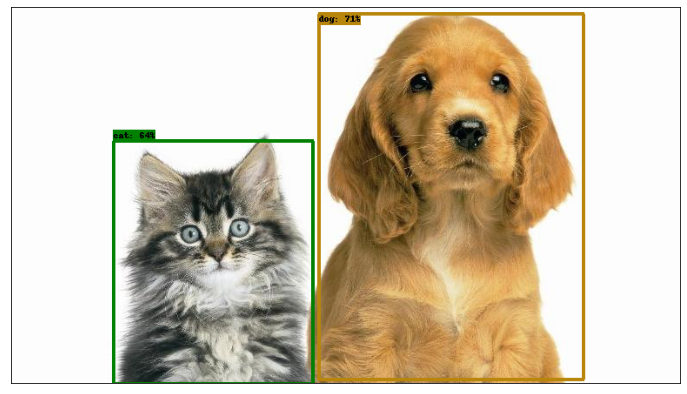

In [10]:
plt.figure(figsize=(12, 12))
plt.imshow(image_with_boxes)
plt.xticks([])
plt.yticks([])
plt.show()

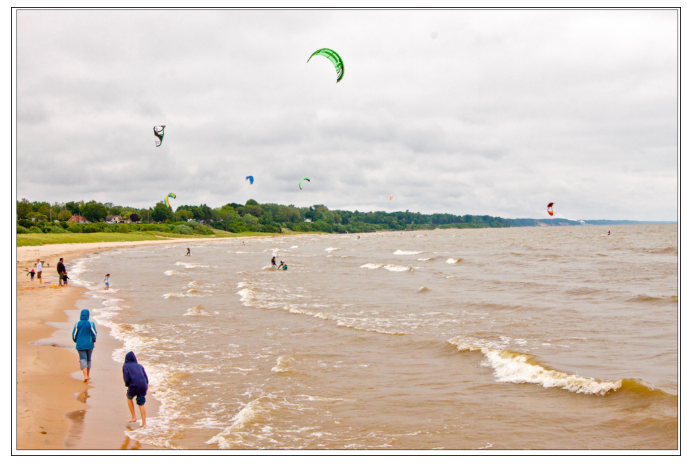

In [11]:
url = 'https://i.ibb.co/R7pRTLy/beach-no-axis.png'
image_path = tf.keras.utils.get_file("beach2.jpg", url)
image = read_image(image_path)
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Inference time:  0.18485116958618164


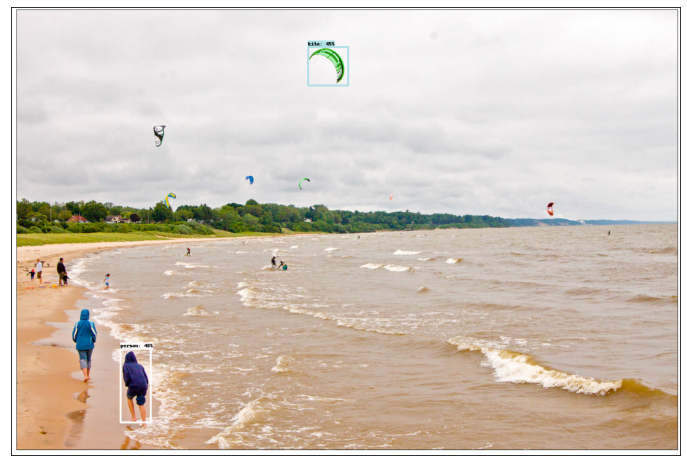

In [12]:
image_with_boxes = run_detector(detector, image, classes)
plt.figure(figsize=(12, 12))
plt.imshow(image_with_boxes)
plt.xticks([])
plt.yticks([])
plt.show()

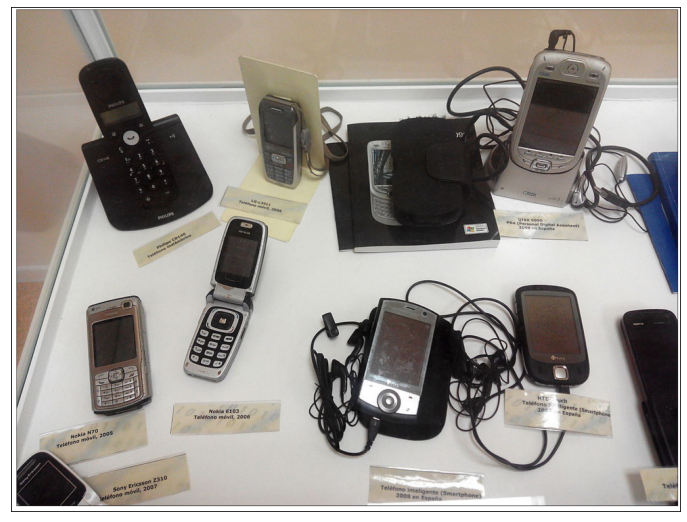

Inference time:  0.1886129379272461


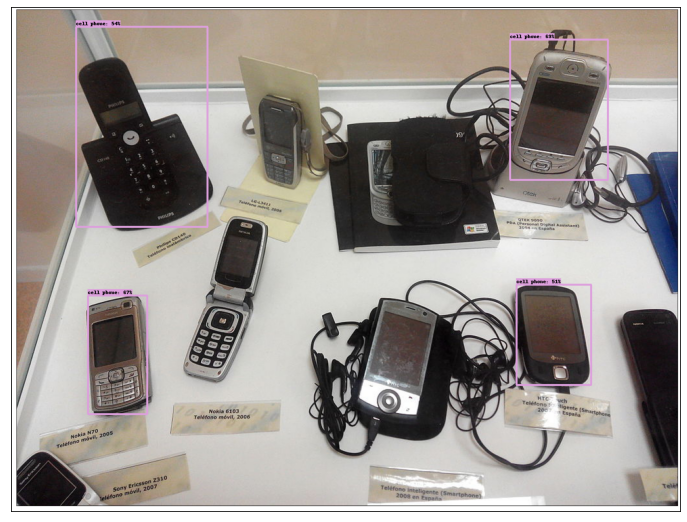

In [13]:
url = 'https://i.ibb.co/jL1kZRF/phones.png'
image_path = tf.keras.utils.get_file("phones.jpg", url)
image = read_image(image_path)
plt.figure(figsize=(12, 12))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

image_with_boxes = run_detector(detector, image, classes)
plt.figure(figsize=(12, 12))
plt.imshow(image_with_boxes)
plt.xticks([])
plt.yticks([])
plt.show()

### Web cam Local
#### Detection loop
The detection loop consists of four phases:

- loading the webcam frame

- pre-processing the image

- running the image through the network

- updating the output with the resulting predictions

In [14]:
!pip install opencv-python
import cv2


In [18]:
# Load the webcam handler
cap = cv2.VideoCapture(0)
time.sleep(1)  ### letting the camera autofocus

In [22]:
cap = cv2.VideoCapture(0)
time.sleep(1)  ### letting the camera autofocus

axes = None
NUM_FRAMES = 100  # you can change this
processed_imgs = []
for i in range(NUM_FRAMES):
    # Load frame from the camera
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    image_boxes = run_detector(detector, frame, classes)
    img = Image.fromarray(np.uint8(image_boxes))#.convert('RGB')
    processed_imgs.append(img)
    cv2.imshow("test", cv2.cvtColor(image_boxes, cv2.COLOR_BGR2RGB))
    cv2.waitKey(1)

Inference time:  0.18430423736572266
Inference time:  0.19208312034606934
Inference time:  0.24288582801818848
Inference time:  0.19934320449829102
Inference time:  0.3691568374633789
Inference time:  0.2371230125427246
Inference time:  0.2133028507232666
Inference time:  0.21155881881713867
Inference time:  0.21783804893493652
Inference time:  0.19297480583190918
Inference time:  0.19024896621704102
Inference time:  0.1973710060119629
Inference time:  0.22008824348449707
Inference time:  0.23452496528625488
Inference time:  0.21399903297424316
Inference time:  0.37065887451171875
Inference time:  0.37052106857299805
Inference time:  0.3652160167694092
Inference time:  0.25082898139953613
Inference time:  0.25138401985168457
Inference time:  0.22309088706970215
Inference time:  0.23308014869689941
Inference time:  0.20583677291870117
Inference time:  0.21581006050109863
Inference time:  0.2034318447113037
Inference time:  0.23452377319335938
Inference time:  0.33495593070983887
Inferen

In [19]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
## create gif
processed_imgs[0].save('web_cam.gif',
                       format='GIF',
                       append_images=processed_imgs[1:],
                       save_all=True,
                       duration=100,
                       loop=0)

In [ ]:
#IPyImage('web_cam.gif', format='png', width=15 * 40, height=3 * 40) 

## Web cam Colab

In [ ]:
'''
## Camera Capture
Using a webcam to capture images for processing on the runtime.
Source: https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi
'''

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      // show the video in the HTML element
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // prints the logs to cell
      let jsLog = function(abc) {
        document.querySelector("#output-area").appendChild(document.createTextNode(`${abc}... `));
      }

      // Wait for Capture to be clicked.
      // await new Promise((resolve) => capture.onclick = resolve);

      for (let i = 0; i < 5; i++) {
        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        img = canvas.toDataURL('image/jpeg', quality);

        // show each captured image
        // let imgTag = document.createElement('img');
        // imgTag.src = img;
        // div.appendChild(imgTag);

        jsLog(i + "sending")
        // Call a python function and send this image
        google.colab.kernel.invokeFunction('notebook.run_algo', [img], {});
        jsLog(i + "SENT")
        // wait for X miliseconds second, before next capture
        await new Promise(resolve => setTimeout(resolve, 250));
      }

      stream.getVideoTracks()[0].stop(); // stop video stream
    }
    ''')
  display(js) # make the provided HTML, part of the cell
  data = eval_js('takePhoto({})'.format(quality)) # call the takePhoto() JavaScript function

In [ ]:
import IPython
from google.colab import output
from google.colab.patches import cv2_imshow

import time
import sys
import numpy as np
import cv2

from PIL import Image
from io import BytesIO
import base64
import logging

def data_uri_to_img(uri):
    """convert base64image to numpy array"""
    try:
        image = base64.b64decode(uri.split(',')[1], validate=True)
        # make the binary image, a PIL image
        image = Image.open(BytesIO(image))
        # convert to numpy array
        image = np.array(image, dtype=np.uint8);
        return image
    except Exception as e:
        logging.exception(e);
        print('\n')
        return None


def run_algo(imgB64):
    """
    in Colab, run_algo function gets invoked by the JavaScript, that sends N images every second
  
    params:
      image: image
    """
    image = data_uri_to_img(imgB64)
    frame = image
    if image is None:
        print("At run_algo(): image is None.")
        return
    try:
        # Run detection
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB).astype('uint8')
        image_boxes = run_detector(detector, frame, classes)
        cv2_imshow(image_boxes)
    except Exception as e:
        logging.exception(e)

# register this function, so JS code could call this
output.register_callback('notebook.run_algo', run_algo)

# put the JS code in cell and run it
take_photo()

## Practice: Traffic Scene  Object Detection

### Scene 1

In [ ]:
## load the scene gif
url_1 = 'https://i.ibb.co/wpHvb58/scene1.gif'
scene_1_path = tf.keras.utils.get_file("scene_1.gif", url_1)

In [ ]:
#IPyImage(scene_1_path, format='png', width=15 * 40, height=3 * 40)
#IPyImage(url=url_1)

In [ ]:
gif_object = Image.open(scene_1_path)

# Display individual frames from the loaded animated GIF file
processed_imgs = []
for ind in range(0, gif_object.n_frames):
    gif_object.seek(ind)
    ## frame in numpy array format (512, 512, 3)
    frame = np.array(gif_object.convert('RGB'))
    ## Object Detection code

    ##
    processed_imgs.append(...)

In [ ]:
## save the processed scene gif
processed_imgs[0].save('scene1_boxes.gif',
                       format='GIF',
                       append_images=processed_imgs[1:],
                       save_all=True,
                       duration=200,
                       loop=0)

In [ ]:
IPyImage('scene1_boxes.gif', format='png', width=15 * 40, height=3 * 40) 

In [ ]:
# Download from colab
#from google.colab import files
#files.download('scene1_boxes.gif') 

### Scene 2

In [ ]:
## load the scene gif
url_2 = 'https://i.ibb.co/wpHvb58/scene2.gif'
scene_2_path = tf.keras.utils.get_file("scene_2.gif", url_1)

In [ ]:
#IPyImage(scene_2_path, format='png', width=15 * 40, height=3 * 40)
#IPyImage(url=url_2)

In [ ]:
gif_object = Image.open(scene_2_path)

# Display individual frames from the loaded animated GIF file
processed_imgs = []
for ind in range(0, gif_object.n_frames):
    gif_object.seek(ind)
    ## frame in numpy array format (512, 512, 3)
    frame = np.array(gif_object.convert('RGB'))
    ## Object Detection code

    ##
    processed_imgs.append(...)

In [ ]:
## save the processed scene gif
processed_imgs[0].save('scene2_boxes.gif',
                       format='GIF',
                       append_images=processed_imgs[1:],
                       save_all=True,
                       duration=200,
                       loop=0)

In [ ]:
IPyImage('scene2_boxes.gif', format='png', width=15 * 40, height=3 * 40)

In [ ]:
# Download from colab
#from google.colab import files
#files.download('scene1_boxes.gif')